In [34]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Clothing/train' #location of train path
valid_path = 'D:/Clothing/validate' #location of test path

In [36]:
# Import the library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [37]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [38]:
# useful for getting number of output classes
folders = glob('D:/Clothing/train/*')

In [39]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [40]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [41]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [42]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [43]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('D:/Clothing/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 983 images belonging to 3 classes.


In [45]:
test_set = test_datagen.flow_from_directory('D:/Clothing/validate',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 170 images belonging to 3 classes.


In [46]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
31/31 [==============================] - 74s 2s/step - loss: 3.4011 - accuracy: 0.4496 - val_loss: 1.7326 - val_accuracy: 0.6235
Epoch 2/50
31/31 [==============================] - 73s 2s/step - loss: 0.8019 - accuracy: 0.6663 - val_loss: 0.6681 - val_accuracy: 0.6941
Epoch 3/50
31/31 [==============================] - 72s 2s/step - loss: 0.7682 - accuracy: 0.6724 - val_loss: 0.5780 - val_accuracy: 0.7176
Epoch 4/50
31/31 [==============================] - 73s 2s/step - loss: 0.6493 - accuracy: 0.6796 - val_loss: 0.5916 - val_accuracy: 0.7412
Epoch 5/50
31/31 [==============================] - 86s 3s/step - loss: 0.8144 - accuracy: 0.6897 - val_loss: 0.7828 - val_accuracy: 0.7176
Epoch 6/50
31/31 [==============================] - 77s 2s/step - loss: 0.7340 - accuracy: 0.6887 - val_loss: 0.9505 - val_accuracy: 0.7235
Epoch 7/50
31/31 [==============================] - 83s 3s/step - loss: 0.8594 - accuracy: 0.7101 - val_loss: 0.5706 - val_accuracy: 0.8176
Epoch 8/50
31/31 [==

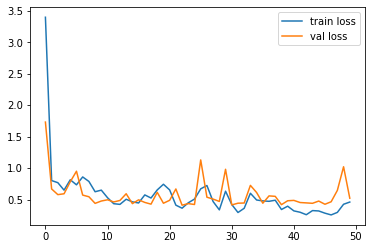

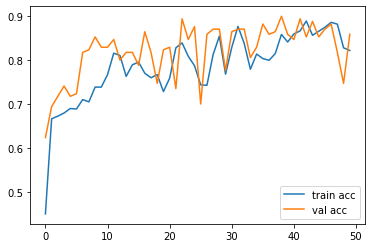

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [49]:
y_pred = model.predict(test_set)

In [50]:
y_pred

array([[3.36390741e-07, 9.99999642e-01, 1.61351021e-08],
       [9.44165350e-08, 9.99995112e-01, 4.75220941e-06],
       [1.40894949e-01, 1.55030296e-12, 8.59104991e-01],
       [9.89550650e-01, 2.38562459e-14, 1.04493154e-02],
       [8.95540424e-08, 9.99996662e-01, 3.25515225e-06],
       [1.62341848e-06, 9.99282181e-01, 7.16223731e-04],
       [1.07152894e-01, 5.96713773e-14, 8.92847180e-01],
       [5.35319388e-01, 4.46755303e-06, 4.64676142e-01],
       [9.69639719e-01, 9.24110788e-10, 3.03603075e-02],
       [1.24763814e-03, 2.37433960e-13, 9.98752356e-01],
       [3.73287428e-08, 1.00000000e+00, 2.72536749e-08],
       [3.13595113e-12, 1.00000000e+00, 1.12254477e-12],
       [1.67570845e-03, 9.97897267e-01, 4.27071791e-04],
       [5.44952154e-01, 9.47718987e-12, 4.55047846e-01],
       [1.24763837e-05, 9.99788940e-01, 1.98521768e-04],
       [1.51801020e-11, 1.00000000e+00, 1.18094354e-10],
       [9.87386167e-01, 6.52261480e-16, 1.26138087e-02],
       [2.34150201e-01, 9.11485

In [51]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [52]:
y_pred

array([1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2,
       0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2], dtype=int64)

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model=load_model('model_resnet50.h5') # load the saved model

In [55]:
img=image.load_img('D:/Clothing/test/S361.jpg',target_size=(224,224)) #testing on new image

In [56]:
x=image.img_to_array(img) 
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [57]:
x.shape #shape of the image

(224, 224, 3)

In [58]:
x=x/255 # rescaling the image

In [59]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape # new shape of the image

(1, 224, 224, 3)

In [60]:
img_data

array([[[[-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ]],

        [[-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ]],

        [[-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ]],

        ...,

        [[-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-102.939, -115.779, -122.68 ],
         [-102.939, -1

In [61]:
model.predict(img_data)

array([[3.4803432e-10, 9.8359632e-01, 1.6403694e-02]], dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1) #prediction over test image

In [63]:
a==1 # checking that its a saree or not as 1 is denotation for saree

array([ True])

In [64]:
a==0 # checking that its a jeans or not as 0 is denotation for jeans

array([False])

In [65]:
a==2 # checking that its a trouser or not as 0 is denotation for trouser

array([False])